In [1]:
from Diffusion_Map import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_swiss_roll
from pca import pca_def
import warnings
warnings.filterwarnings("ignore")

## Task 2.1

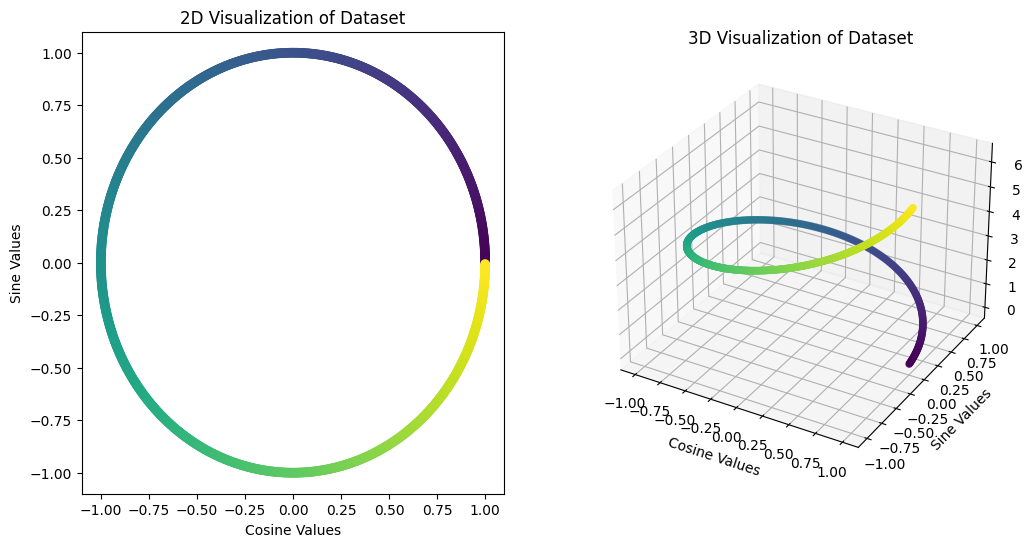

In [2]:
X,tk = create_dataset_subtask1(1000)
visualize_dataset(X, tk)

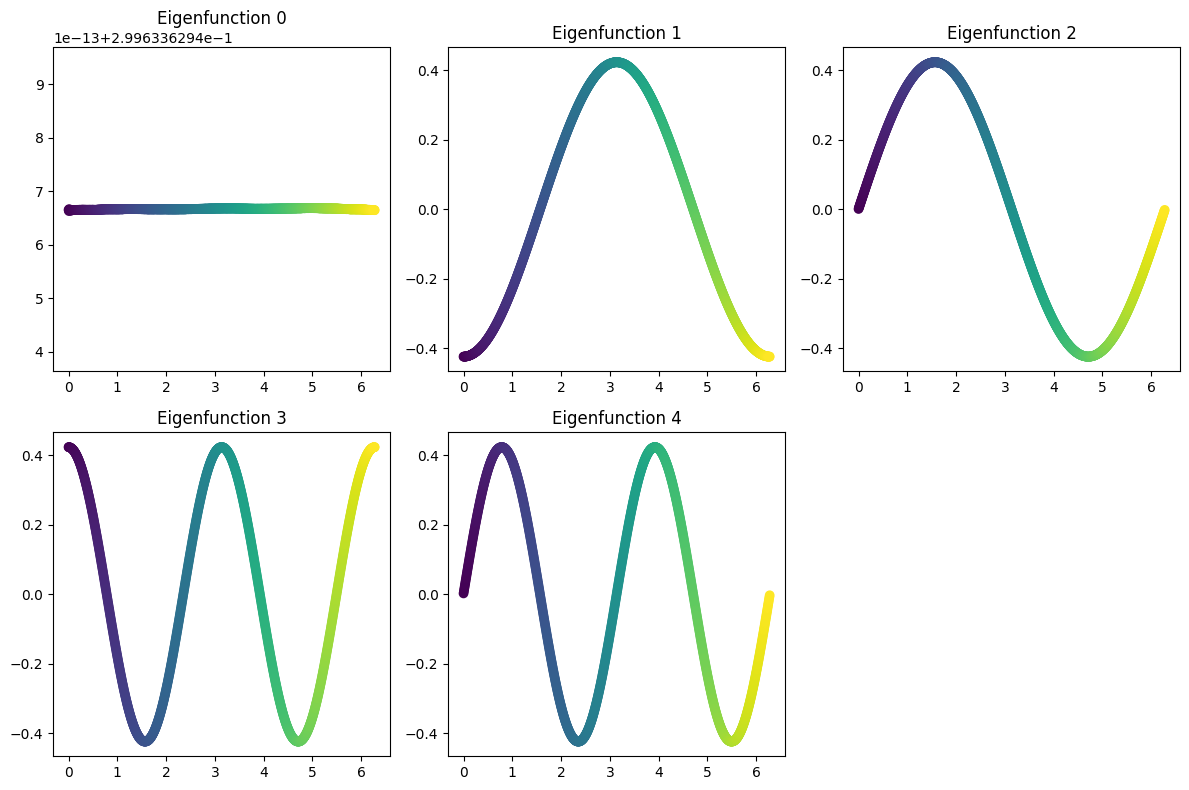

In [3]:
lambda_val,phi_val=diffusion_map(X,5)
# Plotting the eigenvalues
plot_eigenValues(tk, phi_val, 5)

## Task 2.2

In [4]:
# Swiss roll with 5000 points
n = 5000
x, t = make_swiss_roll(n)

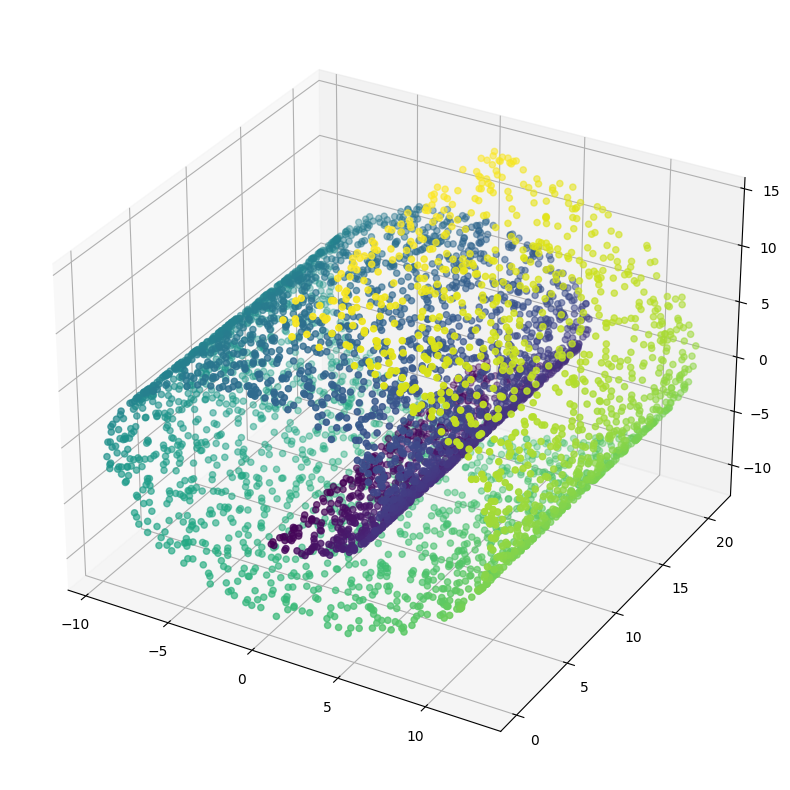

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=t)
plt.savefig("Figures/ex3_task2_swissRoll5000.png")
plt.show()

In [6]:
# Generating 10 eigenfunctions on the swiss-roll dataset
L = 10
lambda_val,phi_val=diffusion_map(x,L)

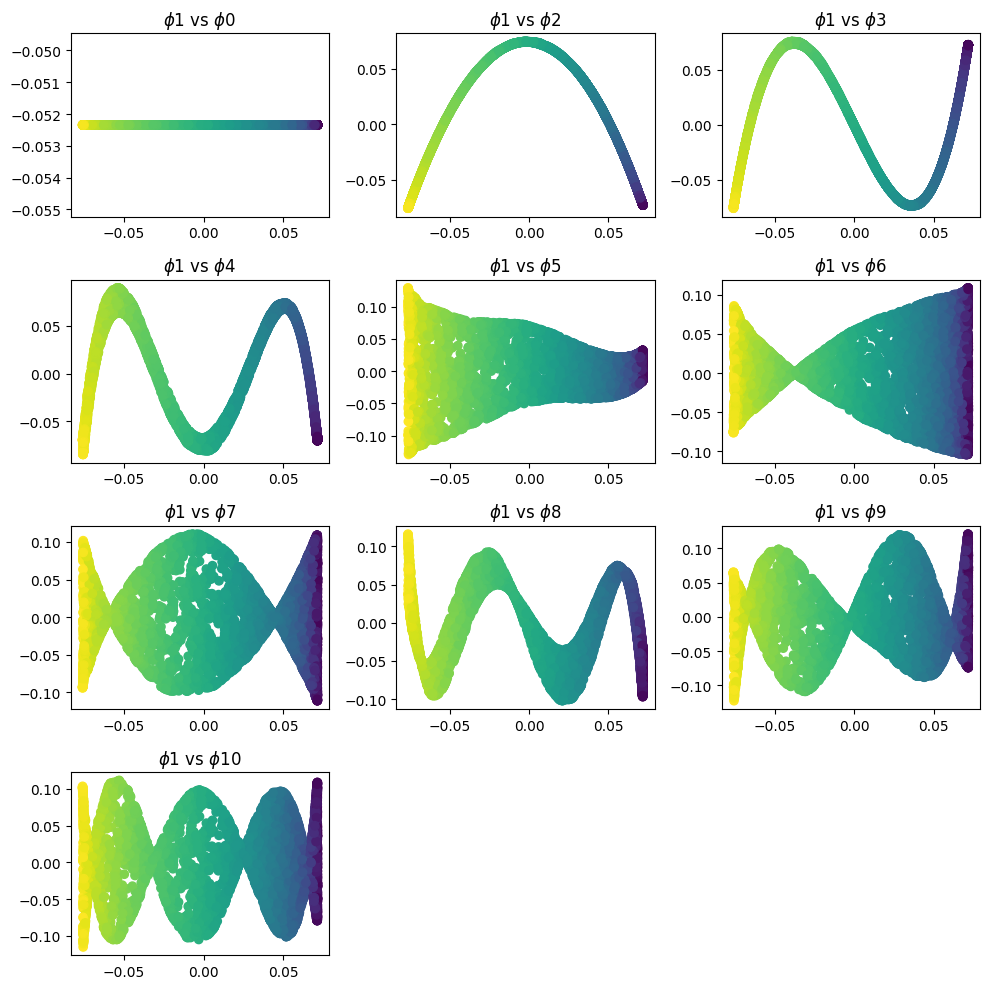

In [7]:
figname = "Figures/task2_5000vals.png"
plot_phi_vals(phi_val, L, t, figname)

### PCA on swiss roll dataset

In [8]:
#PCA with 3 Principal Components
pca_energy, variance, centered_data, U, S, Vt, transformed_data, reconstructed_data = pca_def(x,3)

In [9]:
print("The pca energy is {:.2f}%:".format(pca_energy*100))
print("The 3 principal components are:", Vt)

The pca energy is 100.00%:
The 3 principal components are: [[ 0.45674132  0.00200992  0.88959729]
 [-0.88609445 -0.08765486  0.45514092]
 [ 0.07889232 -0.99614888 -0.03825462]]


In [10]:
#PCA with 2 Principal components
pca_energy, variance, centered_data, U, S, Vt, transformed_data, reconstructed_data = pca_def(x,2)

In [11]:
print("The pca energy is {:.2f}%".format(pca_energy*100))
print("PCA energy lost is {:.2f}%".format((1-pca_energy)*100))

The pca energy is 70.98%
PCA energy lost is 29.02%


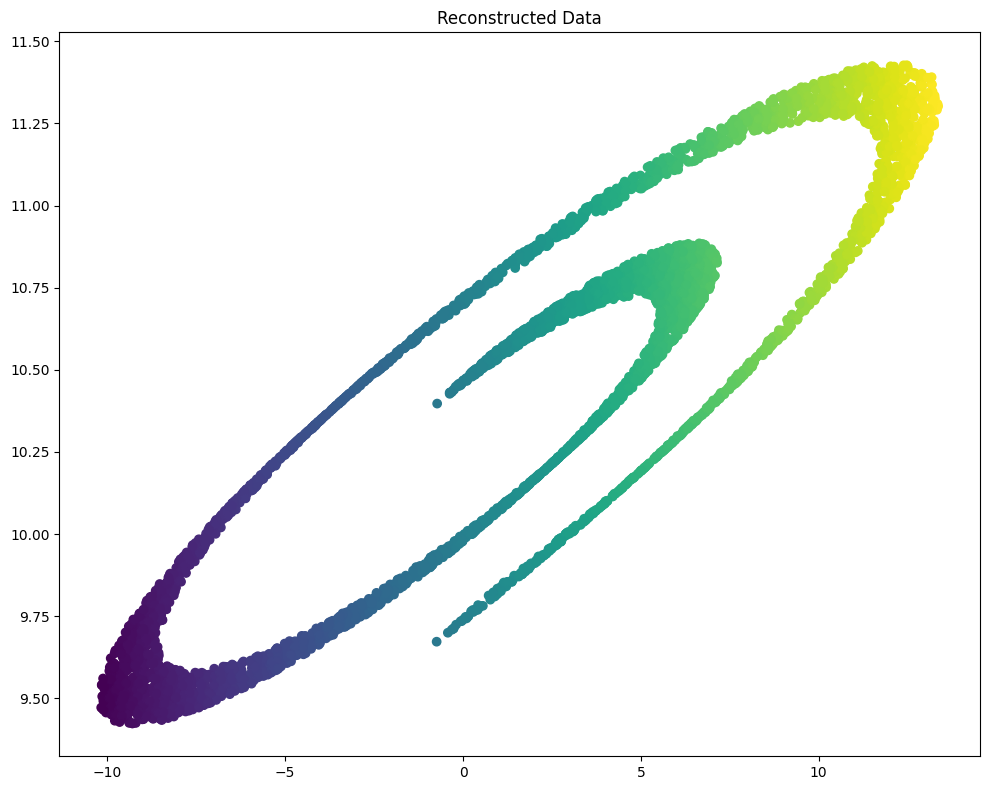

In [12]:
# Visualizing the reconstructed data
plt.figure(figsize=(10, 8))

plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label='Reconstructed Data', c=reconstructed_data[:,0], cmap='viridis')
plt.title('Reconstructed Data')

plt.savefig("Figures/task2_reconstructedPCA.png")
plt.tight_layout()
plt.show()

#### With 1000 points

In [13]:
# With 1000 points
n = 1000
x, t = make_swiss_roll(n)

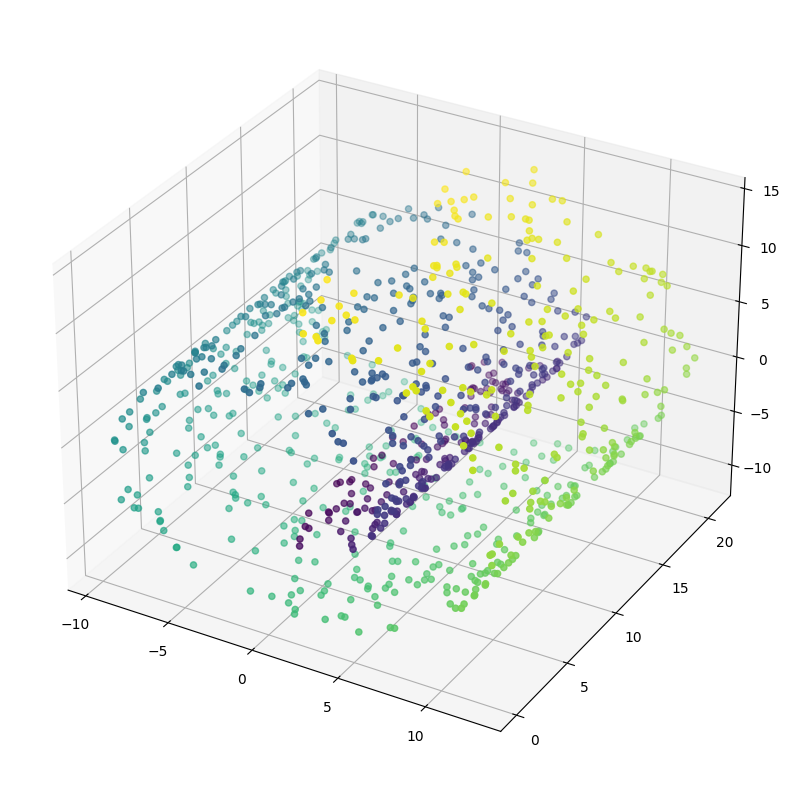

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=t)
plt.show()

In [15]:
L = 10
lambda_val,phi_val=diffusion_map(x,L)

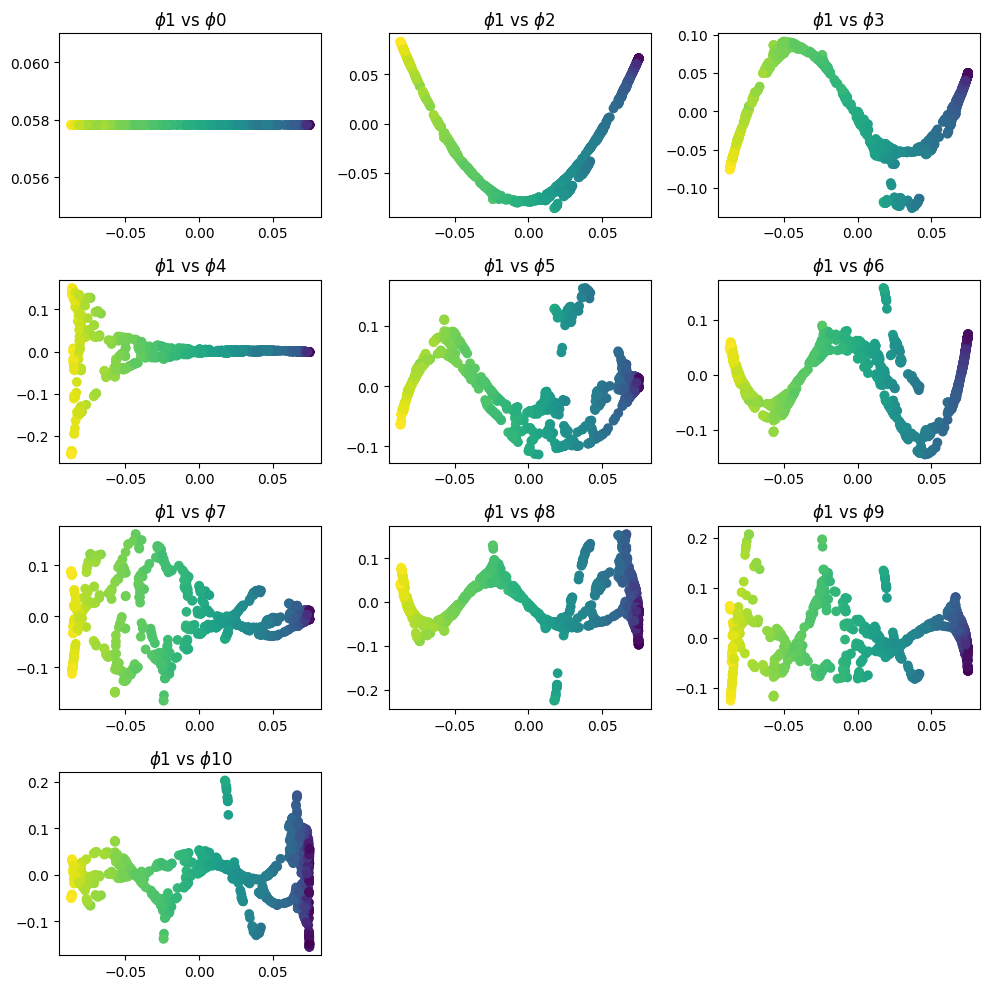

In [16]:
figname = "Figures/task2_1000vals.png"
plot_phi_vals(phi_val, L, t,figname)

# Task 2.3

In [4]:
data3 = pd.read_csv('data/data_DMAP_PCA_vadere.txt', sep=' ') #took the data from the file

eigenvalues, eigenvectors = diffusion_map(data3, 7) #took the eigenvalues and eigenvectors from the diffusion map function

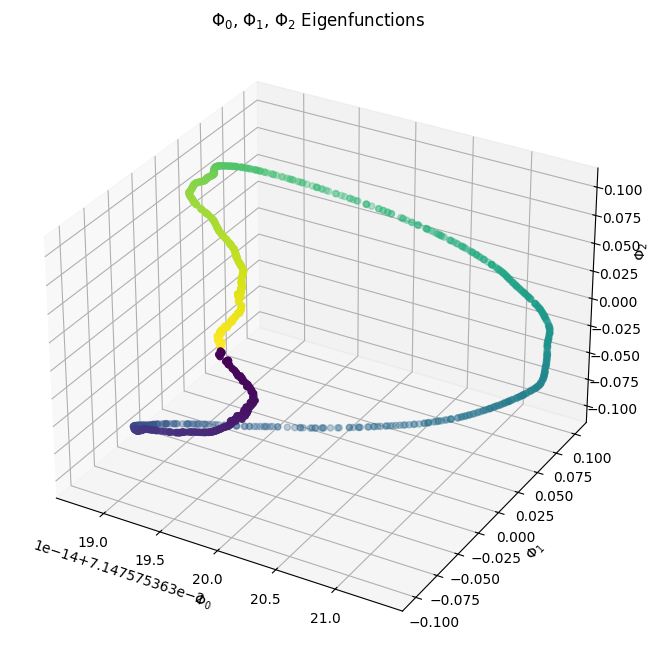

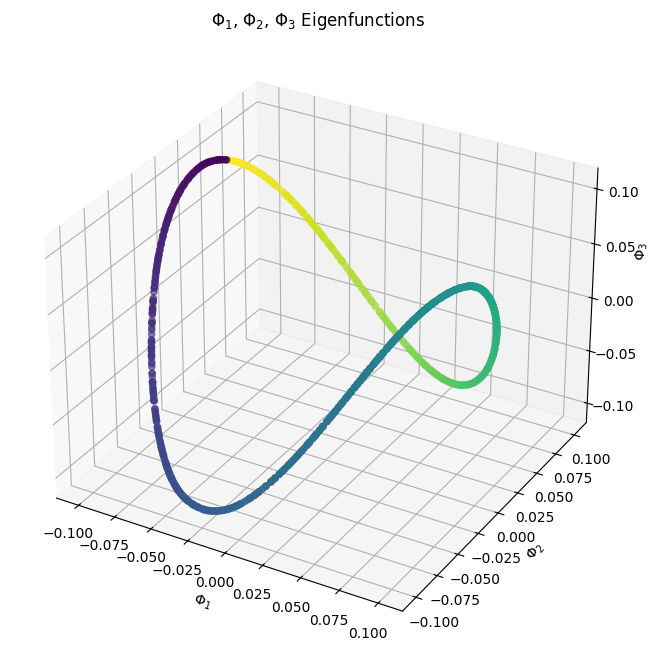

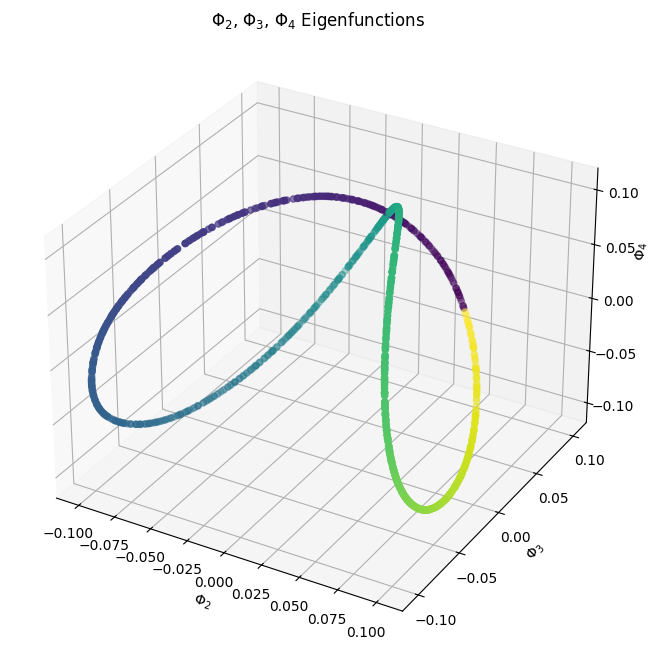

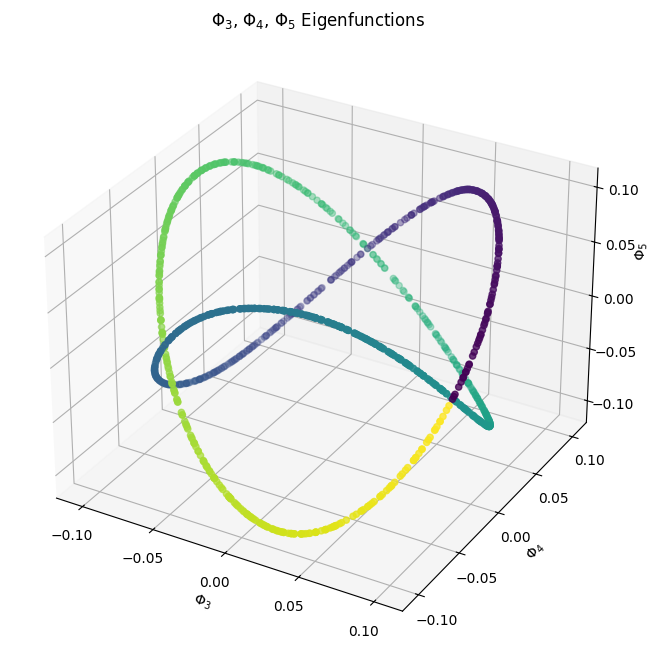

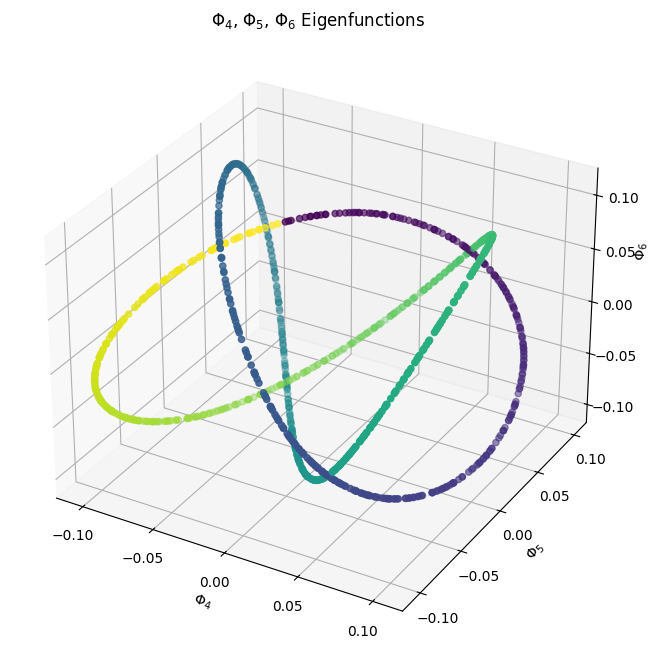

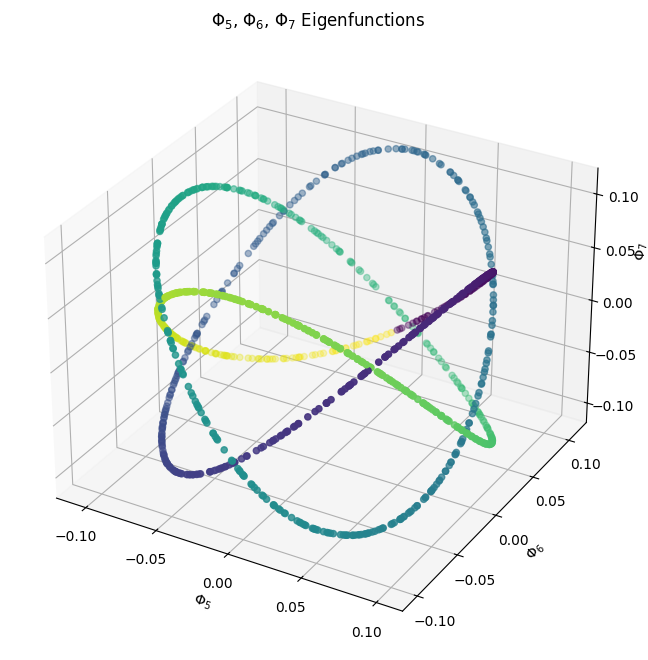

In [5]:
def plot_pedestrian_path_3d(first_eigen_number: int = 1):
    """
    Plot a 3D scatter plot of the selected eigenfunctions.

    Parameters:
    - first_eigen_number (int): Index of the first eigenfunction to plot. Default is 1.

    Note:
    - This function visualizes the 3D scatter plot of selected eigenfunctions from the diffusion map.
    - It uses the specified indices of the eigenvectors to represent pedestrian paths in a 3D space.

    """
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')  # Create a 3D axis

    # Scatter plot using selected eigenfunctions
    ax.scatter(
        eigenvectors[:, first_eigen_number],
        eigenvectors[:, first_eigen_number + 1],
        eigenvectors[:, first_eigen_number + 2],
        c=range(len(eigenvectors)),
        cmap='viridis'
    )

    # Set plot labels and title
    ax.set_title(rf"$Φ_{first_eigen_number}$, $Φ_{first_eigen_number+1}$, $Φ_{first_eigen_number+2}$ Eigenfunctions")
    ax.set_xlabel(rf"$Φ_{first_eigen_number}$")
    ax.set_ylabel(rf"$Φ_{first_eigen_number+1}$")
    ax.set_zlabel(rf"$Φ_{first_eigen_number+2}$")
    ax.grid(True)

    plt.show()

for i in range(6):
    plot_pedestrian_path_3d(i)

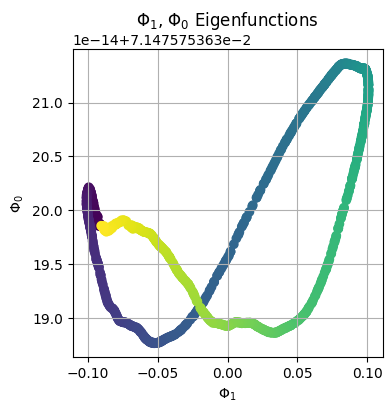

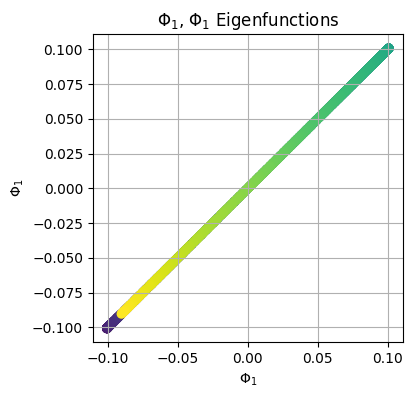

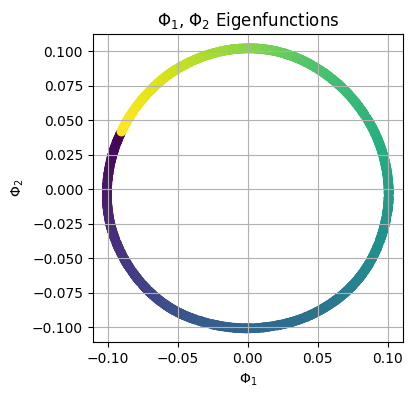

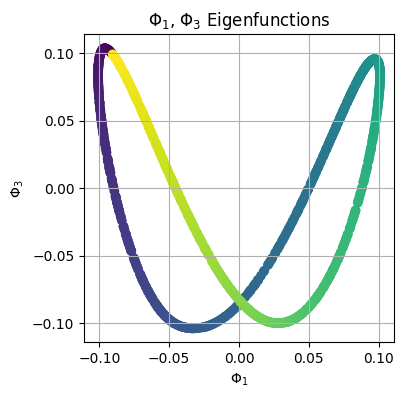

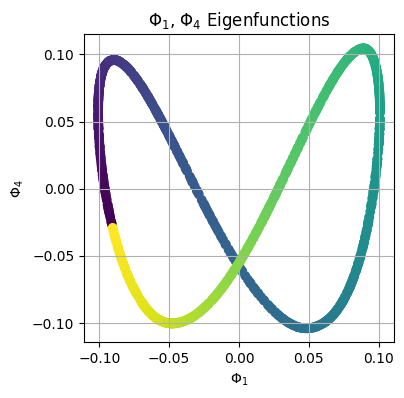

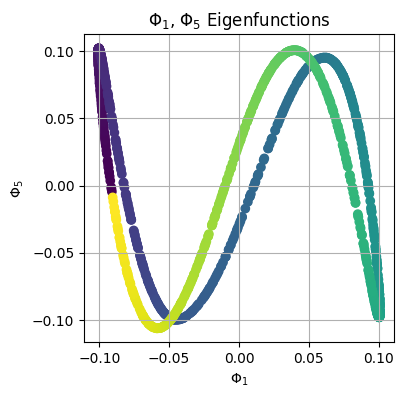

In [6]:
def plot_pedestrian_path_2d(second_eigen_number: int = 1):
    """
    Plot a 2D scatter plot of selected eigenfunctions.

    Parameters:
    - second_eigen_number (int): Index of the second eigenfunction to plot. Default is 1.

    Note:
    - This function visualizes the 2D scatter plot of selected eigenfunctions from the diffusion map.
    - It uses the specified indices of the eigenvectors to represent pedestrian paths in a 2D space.

    """
    fig, ax = plt.subplots(figsize=(4, 4))

    # Scatter plot using selected eigenfunctions
    ax.scatter(
        eigenvectors[:, 1],
        eigenvectors[:, second_eigen_number],
        c=range(len(eigenvectors)),
        cmap='viridis'
    )

    # Set plot labels and title
    ax.set_title(rf"$Φ_{1}$, $Φ_{second_eigen_number}$ Eigenfunctions")
    ax.set_xlabel(rf"$Φ_{1}$")
    ax.set_ylabel(rf"$Φ_{second_eigen_number}$")
    ax.grid(True)

    plt.show()


for i in range(6):
    plot_pedestrian_path_2d(i)


## Bonus Task

In [18]:
import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector

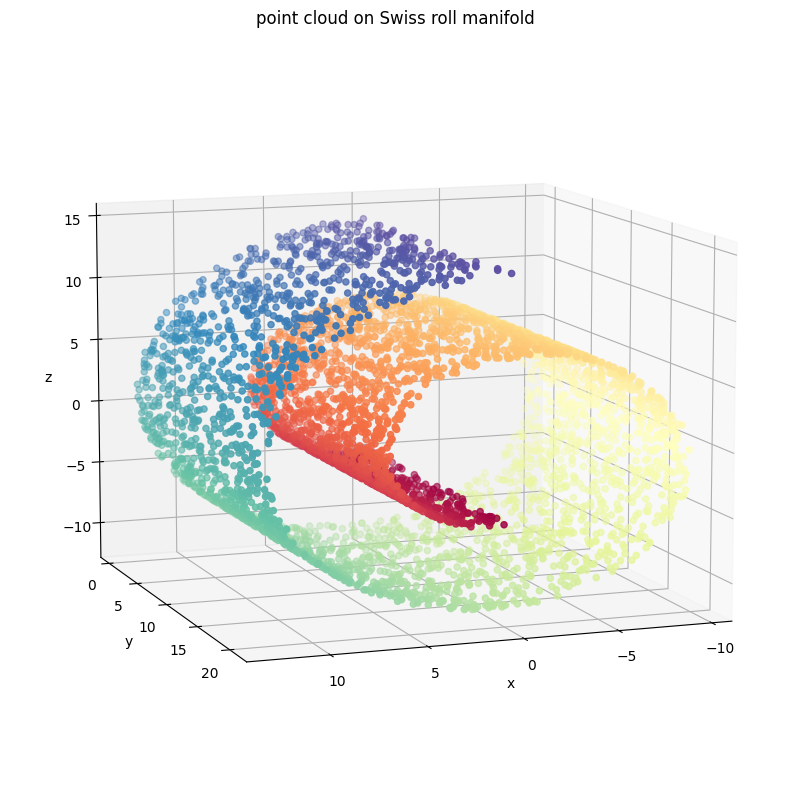

In [19]:
nr_samples = 5000

rng = np.random.default_rng(1)

# reduce number of points for plotting
nr_samples_plot = 5000
idx_plot = rng.permutation(nr_samples)[0:nr_samples_plot]

# generate point cloud
X, X_color = make_swiss_roll(nr_samples, random_state=3, noise=0)

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    X[idx_plot, 0],
    X[idx_plot, 1],
    X[idx_plot, 2],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("point cloud on Swiss roll manifold")
ax.view_init(10, 70)

In [20]:
X_pcm = pfold.PCManifold(X)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=0.5648796869254895, cut-off=3.225750822924518


(<Figure size 1500x1500 with 8 Axes>,
 array([[<AxesSubplot: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{0}$'}>,
         <AxesSubplot: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{2}$'}>],
        [<AxesSubplot: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{3}$'}>,
         <AxesSubplot: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{4}$'}>],
        [<AxesSubplot: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{5}$'}>,
         <AxesSubplot: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{6}$'}>],
        [<AxesSubplot: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{7}$'}>,
         <AxesSubplot: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{8}$'}>]],
       dtype=object))

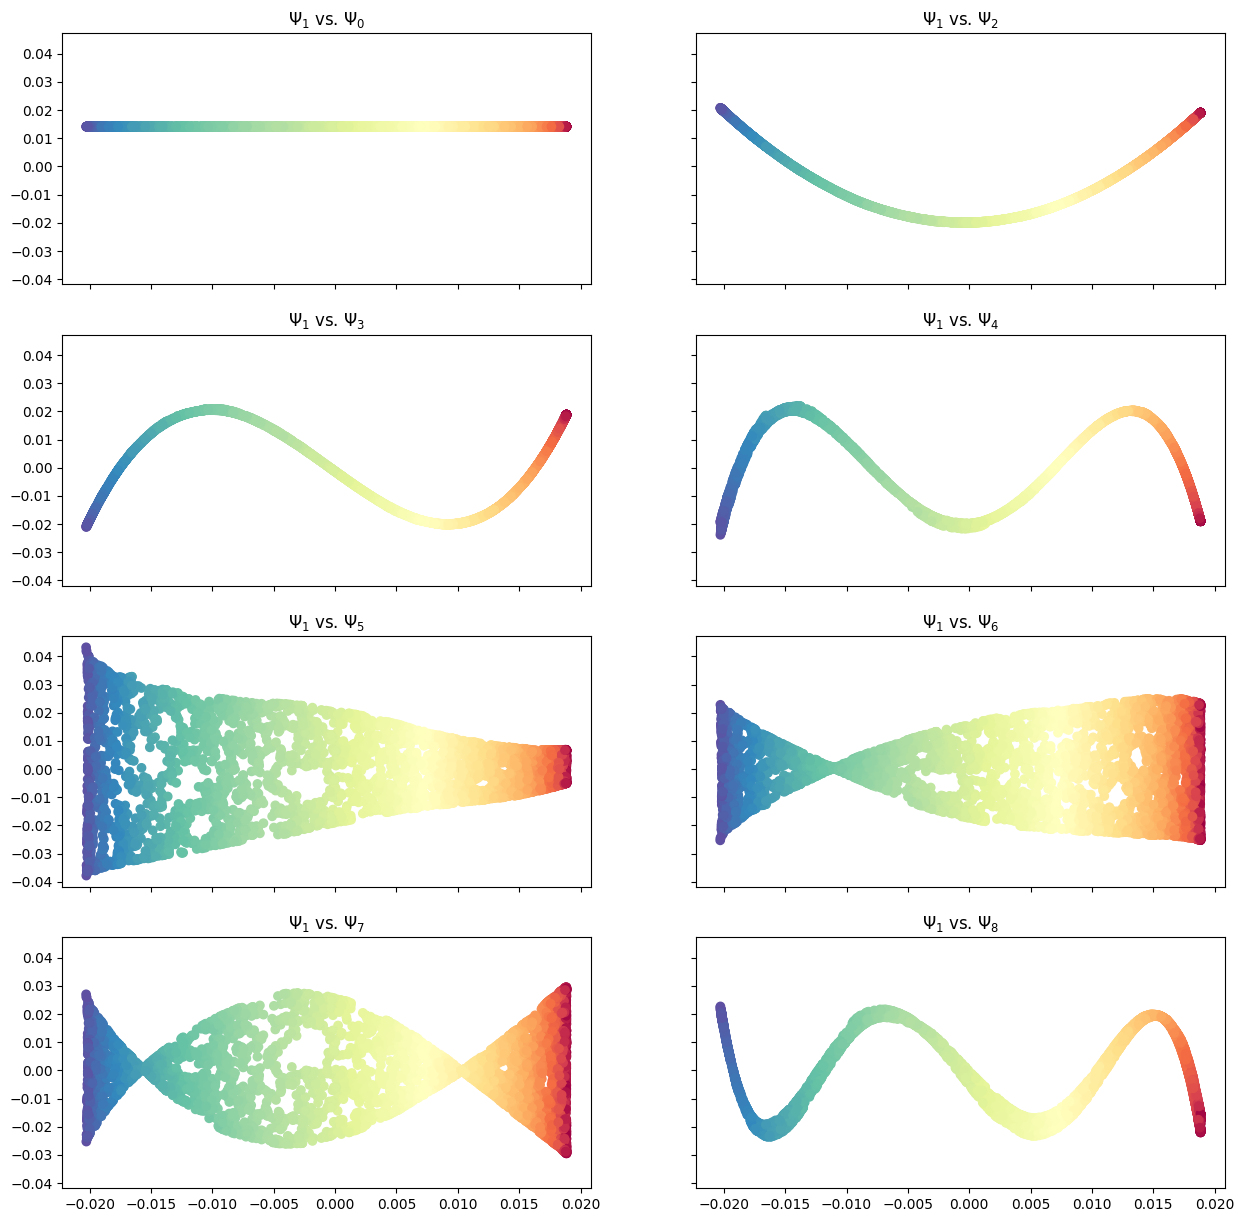

In [21]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(
        epsilon=X_pcm.kernel.epsilon, distance=dict(cut_off=X_pcm.cut_off)
    ),
    n_eigenpairs=9,
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_[idx_plot, :],
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]),
)

In [22]:
selection = LocalRegressionSelection(
    intrinsic_dim=2, n_subsample=500, strategy="dim"
).fit(dmap.eigenvectors_)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

Found parsimonious eigenvectors (indices): [1 5]


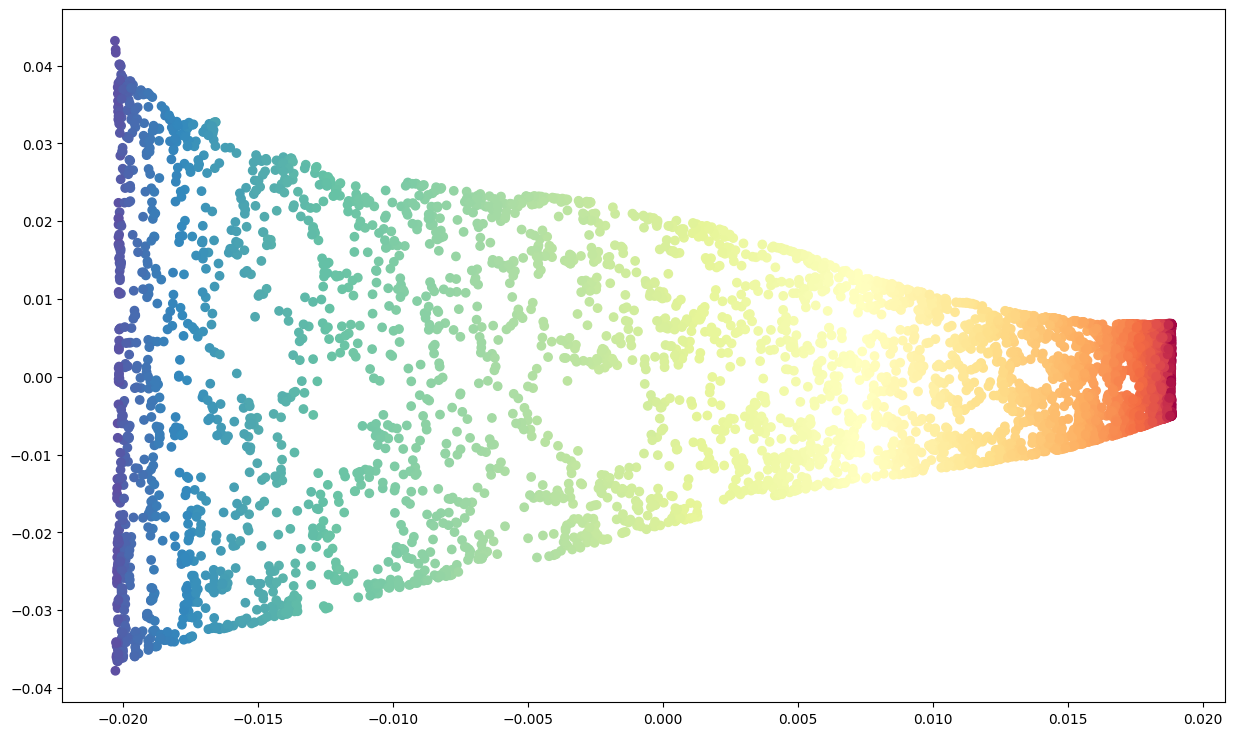

In [23]:
target_mapping = selection.transform(dmap.eigenvectors_)

f, ax = plt.subplots(figsize=(15, 9))
ax.scatter(
    target_mapping[idx_plot, 0],
    target_mapping[idx_plot, 1],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
);